In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
data = pd.read_csv('EMS_Incident_Dispatch_Data.csv')   
df = pd.DataFrame(data)

/Users/bradzhang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,11,17,21,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
sample_df = df.sample(frac = 0.2)

In [4]:
cleaned = sample_df[['CAD_INCIDENT_ID','FINAL_CALL_TYPE','FINAL_SEVERITY_LEVEL_CODE','DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','BOROUGH','ZIPCODE','POLICEPRECINCT']]


In [6]:
cleaned.dropna()

,CAD_INCIDENT_ID,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BOROUGH,ZIPCODE,POLICEPRECINCT
3911561,140032643,INJURY,5,17,628.0,611.0,QUEENS,11105,114.0
3968893,140190039,INJURY,5,35,169.0,134.0,MANHATTAN,10027,28.0
7191117,161241418,RESPIR,4,33,391.0,358.0,BRONX,10451,44.0
17493803,50110863,RESPIR,4,12,382.0,370.0,QUEENS,11368,110.0
11434576,102480851,SICK,4,36,293.0,257.0,BROOKLYN,11239,75.0
...,...,...,...,...,...,...,...,...,...
19045851,61443434,DRUG,4,75,927.0,852.0,RICHMOND / STATEN ISLAND,10314,120.0
18473783,53253191,INJMAJ,3,96,606.0,510.0,BRONX,10451,44.0
13429833,180181970,DIFFBR,2,22,370.0,348.0,BROOKLYN,11207,75.0
21925733,211581312,CARDBR,2,20,235.0,215.0,MANHATTAN,10029,25.0


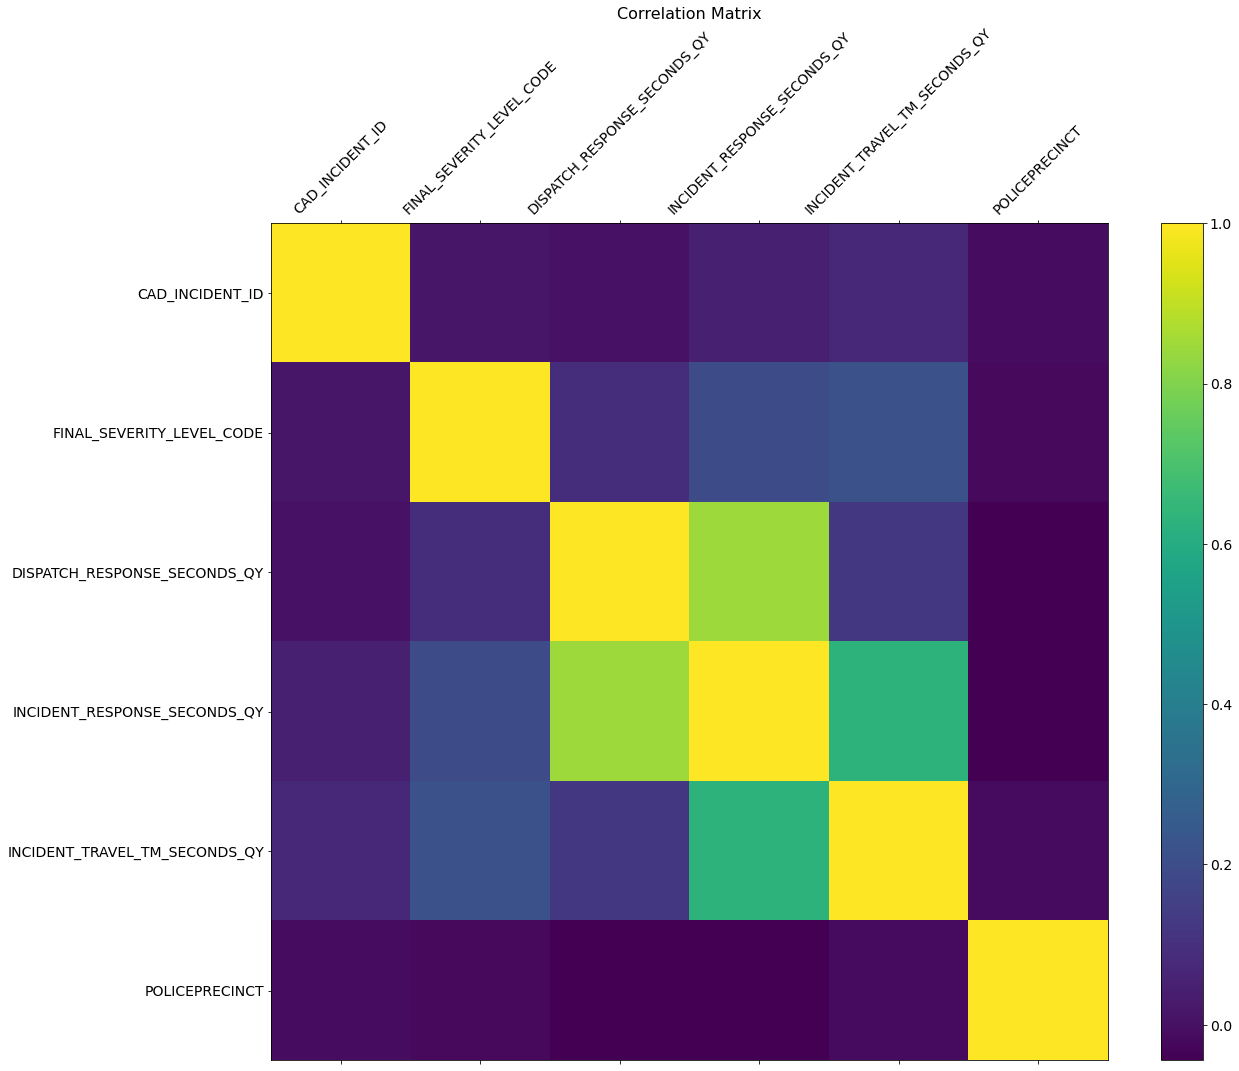

In [7]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(cleaned.corr(), fignum=f.number)
plt.xticks(range(cleaned.select_dtypes(['number']).shape[1]), cleaned.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(cleaned.select_dtypes(['number']).shape[1]), cleaned.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
response_time = cleaned.groupby(by=['FINAL_CALL_TYPE','FINAL_SEVERITY_LEVEL_CODE']).mean().reset_index()

In [26]:
response_time

,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,CAD_INCIDENT_ID,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,POLICEPRECINCT
0,ABDFC,4,9.117331e+07,25.000000,792.000000,767.000000,75.000000
1,ABDFC,5,9.118451e+07,72.750000,599.000000,526.250000,66.750000
2,ABDPFC,3,2.164689e+08,152.500000,465.500000,313.000000,34.000000
3,ABDPFC,4,1.990224e+08,50.316667,559.568966,508.034483,61.433333
4,ABDPFC,5,2.025670e+08,68.443033,561.503463,502.497835,64.204758
...,...,...,...,...,...,...,...
378,UNKNOW,2,1.696736e+08,45.866667,598.800000,552.933333,79.000000
379,UNKNOW,3,9.587954e+07,46.981640,420.015300,373.391749,60.989316
380,UNKNOW,4,1.786192e+08,64.719030,541.322359,477.505055,60.005153
381,UNKNOW,7,1.712755e+08,19.500000,469.000000,449.500000,56.000000


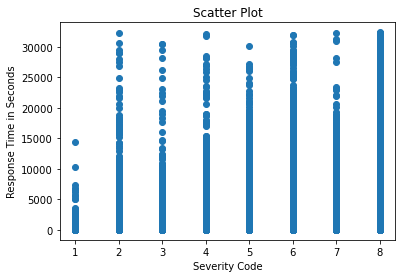

In [17]:
# Scatter plot with day against tip
plt.scatter(cleaned['FINAL_SEVERITY_LEVEL_CODE'], cleaned['DISPATCH_RESPONSE_SECONDS_QY'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Severity Code')
plt.ylabel('Dispatch Response Time')
 
plt.show()

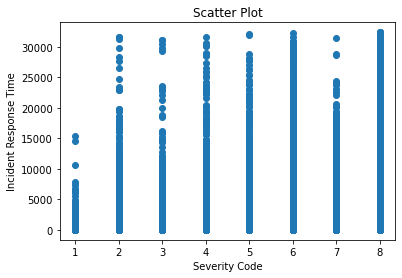

In [18]:
plt.scatter(cleaned['FINAL_SEVERITY_LEVEL_CODE'], cleaned['INCIDENT_RESPONSE_SECONDS_QY'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Severity Code')
plt.ylabel('Incident Response Time')
 
plt.show()

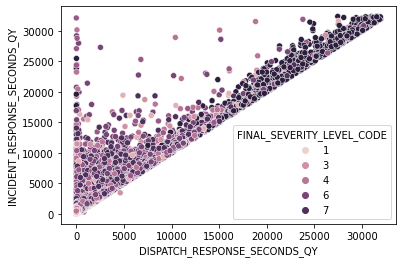

In [20]:
import seaborn as sns
 
sns.scatterplot(x='DISPATCH_RESPONSE_SECONDS_QY', y='INCIDENT_RESPONSE_SECONDS_QY', data=cleaned,
               hue='FINAL_SEVERITY_LEVEL_CODE')
plt.show()

/Users/bradzhang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


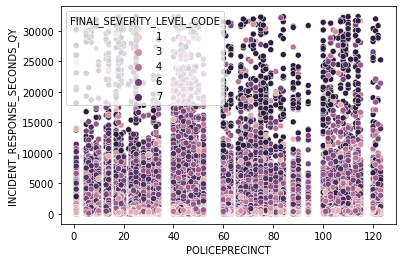

In [24]:
sns.scatterplot(x='POLICEPRECINCT', y='INCIDENT_RESPONSE_SECONDS_QY', data=cleaned,
               hue='FINAL_SEVERITY_LEVEL_CODE')
plt.show()

In [28]:
boroughs = cleaned.groupby(by=['BOROUGH']).mean().reset_index()

In [32]:
boroughs_final = boroughs[['BOROUGH','DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [33]:
boroughs_final

,BOROUGH,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY
0,BRONX,105.715826,571.097524,467.809069
1,BROOKLYN,68.746860,527.193646,459.700029
2,MANHATTAN,110.314965,566.099236,457.988959
3,QUEENS,54.076575,501.634224,449.335779
4,RICHMOND / STATEN ISLAND,44.143617,459.601165,418.068173
5,UNKNOWN,1002.428571,1563.833333,500.216216


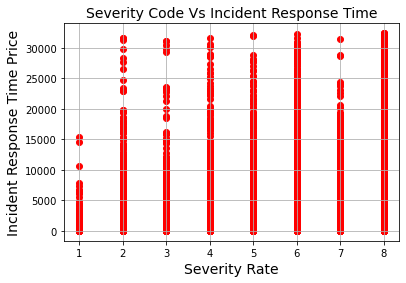

In [35]:
plt.scatter(cleaned['FINAL_SEVERITY_LEVEL_CODE'], cleaned['INCIDENT_RESPONSE_SECONDS_QY'], color='red')
plt.title('Severity Code Vs Incident Response Time', fontsize=14)
plt.xlabel('Severity Rate', fontsize=14)
plt.ylabel('Incident Response Time Price', fontsize=14)
plt.grid(True)
plt.show()

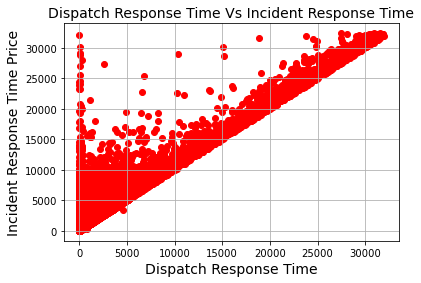

In [36]:
plt.scatter(cleaned['DISPATCH_RESPONSE_SECONDS_QY'], cleaned['INCIDENT_RESPONSE_SECONDS_QY'], color='red')
plt.title('Dispatch Response Time Vs Incident Response Time', fontsize=14)
plt.xlabel('Dispatch Response Time', fontsize=14)
plt.ylabel('Incident Response Time Price', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
cleaned = cleaned.dropna()

In [41]:
from sklearn import linear_model
import statsmodels.api as sm

X = cleaned[['FINAL_SEVERITY_LEVEL_CODE','DISPATCH_RESPONSE_SECONDS_QY']]
y = cleaned['INCIDENT_RESPONSE_SECONDS_QY']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 271.1995982854357
Coefficients: 
 [43.49949337  1.07161985]
                                 OLS Regression Results                                 
Dep. Variable:     INCIDENT_RESPONSE_SECONDS_QY   R-squared:                       0.720
Model:                                      OLS   Adj. R-squared:                  0.720
Method:                           Least Squares   F-statistic:                 5.615e+06
Date:                          Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                                  18:23:39   Log-Likelihood:            -3.1562e+07
No. Observations:                       4376996   AIC:                         6.312e+07
Df Residuals:                           4376993   BIC:                         6.312e+07
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                   co

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = cleaned[['FINAL_SEVERITY_LEVEL_CODE','DISPATCH_RESPONSE_SECONDS_QY']]
y = cleaned['INCIDENT_RESPONSE_SECONDS_QY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(X, y)

y_prediction = regr.predict(X_test)

score=r2_score(y_test,y_prediction)
print('R^2 score: ',score)
print('MSE: ', mean_squared_error(y_test,y_prediction))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_prediction)))

R^2 score:  0.7203704041380895
MSE:  108600.12941593894
RMSE:  329.5453374210276
